# Data Scientist Hiring Challenge

## Background
An E-commerce website has hundreds of thousands of visitors everyday. The visitors come from several marketing channels such as digital campaigns on social media, referrals from publishers, organic search and CRM.


The main business here is collecting traffic from different sources/channels and converting those visitors to leads. A marketing lead is **a person who shows interest in a brand's products or services**, which makes a visitor a potential customer for the seller/service provider. The primary goal of any company is to generate as many leads as possible to ultimately increase conversion rates in the sales funnel.


The main aim in the challenge is to develop a model that can forecast the next day number of leads.

 

## Datasets and Features
There is one main dataset and three others as auxiliary:

1. Transactions dataset is the main dataset that stores the number of leads for each minute broken down according to products and channels. The data goes back till 29.09.2020.
    
    Features:

    * pk: primary key and unique ID in the database table
    * ga_transactionid: the id of the transaction from google Analytics
    * ga_datehour: the time of the transaction in yyyymmddHH format
    * ga_products: name of the products (Product A, Product B, Product C, Product D, Product E, Product F)
    * ga_channels: the channel a visitor comes for (Facebook, Google Ads, Organic search, Direct, CRM)
    * ga_itemquantity: number of leads

2. Economic calendar dataset keeps record of all events that may affect economic variables such as currency exchange rate, interest rate, and stockes in the market.
    
    Features:

    * pk: primary key and unique ID in the database table  
    * date: starts from 28.04.2021
    * time: when the event takes place
    * country: where the event happened
    * indicator: the name of the event
    * priority: there are three levels (1, 2, 3) where 3 is the highest priority
    * exception: anticipated market impact  
    * previous: represents the previous market impact either positive or negative
 

3. Economic variables dataset observes and keeps track of the changes in terms of important variables such as USDTRY or BIST100. The dataset stores the variables daily at three different hours (09, 12, 15) hrs.
    
    Features:

    * pk: primary key and unique ID in the database table
    * date: starts from 28.04.2021
    * hour: (09, 12, 15) hrs
    * bist100: Borsa Istanbul stock exchange
    * usdtry: usd and try exchange rate
    * eurtry: eur and try exchange rate
    * eurusd: eur and usd exchange rate
    * faiz: interest rate in Turkey
    * xau: gold price in ounce
    * brent: Atlantic basin crude oils price
4. Live Digital campaigns dataset that has the number of live digital campaigns for everyday since 29.09.2020.
    
    Features:

    * date: since 29.09.2020
    * live_campaigns: numeric value of the number of campaign


## Tasks
1. Give some analysis on the relationship between the economical events and variables and their impacts on the daily number of visitors.
2. Using Transaction dataset, forecast the next day leads for each channel (Facebook, CRM and so on).
3. Given the number of live digital campaigns and other auxiliary datasets, try to optimise the performance of your forecasting model (or even develop a new model).

## Deliverables


Write your solution on jupyter notebooks for each task (analysis and model development) and make it clear you explain what you are doing properly.


Your jupyter notebooks for each task should be named in the following format: Task1.ipynb, Task2.ipynb and Task3.ipynb


Make sure that your code is replicable and you document your approach and code in a clear way.

## Task 1
Give some analysis on the relationship between the economical events and variables and their impacts on the daily number of visitors.

1. Economic calendar dataset keeps record of all events that may affect economic variables such as currency exchange rate, interest rate, and stockes in the market.
    
    Features:

    * pk: primary key and unique ID in the database table  
    * date: starts from 28.04.2021
    * time: when the event takes place
    * country: where the event happened
    * indicator: the name of the event
    * priority: there are three levels (1, 2, 3) where 3 is the highest priority
    * exception: anticipated market impact  
    * previous: represents the previous market impact either positive or negative
 

2. Economic variables dataset observes and keeps track of the changes in terms of important variables such as USDTRY or BIST100. The dataset stores the variables daily at three different hours (09, 12, 15) hrs.
    
    Features:

    * pk: primary key and unique ID in the database table
    * date: starts from 28.04.2021
    * hour: (09, 12, 15) hrs
    * bist100: Borsa Istanbul stock exchange
    * usdtry: usd and try exchange rate
    * eurtry: eur and try exchange rate
    * eurusd: eur and usd exchange rate
    * faiz: interest rate in Turkey
    * xau: gold price in ounce
    * brent: Atlantic basin crude oils price
   
In this scenario, leads means visitors. So, in transactions dataset, we can find daily visitor.

3. Transactions dataset is the main dataset that stores the number of leads for each minute broken down according to products and channels. The data goes back till 29.09.2020.
    
    Features:

    * pk: primary key and unique ID in the database table
    * ga_transactionid: the id of the transaction from google Analytics
    * ga_datehour: the time of the transaction in yyyymmddHH format
    * ga_products: name of the products (Product A, Product B, Product C, Product D, Product E, Product F)
    * ga_channels: the channel a visitor comes for (Facebook, Google Ads, Organic search, Direct, CRM)
    * ga_itemquantity: number of leads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Economic events are in economic calender dataset. Let's read economic calender dataset first. 
df_economic_calender = pd.read_csv("economic_calendar.csv")
#Let's read economic variables dataset also.
df_economic_variables = pd.read_csv("economic_variables.csv")

In [3]:
df_economic_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pk       624 non-null    int64  
 1   date     624 non-null    object 
 2   hour     624 non-null    int64  
 3   bist100  624 non-null    float64
 4   usdtry   624 non-null    float64
 5   eurtry   624 non-null    float64
 6   eurusd   624 non-null    float64
 7   faiz     624 non-null    float64
 8   xau      624 non-null    float64
 9   brent    624 non-null    float64
 10  bky      208 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 53.8+ KB


In [4]:
df_ev = df_economic_variables.groupby(by="date").mean()

In [5]:
df_ev.drop(labels=["pk","hour"],axis=1,inplace=True)

In [6]:
#Let's also find percentage change day by day and save it in columns
df_ev = pd.merge(df_ev,df_ev.pct_change(),left_index=True,right_index=True,suffixes=("","%"))

In [7]:
df_ev.head()

,bist100,usdtry,eurtry,eurusd,faiz,xau,brent,bky,bist100%,usdtry%,eurtry%,eurusd%,faiz%,xau%,brent%,bky%
date,,,,,,,,,,,,,,,,
2021-04-28,1388.590000,8.2159,9.937900,1.2096,18.08,1773.860000,67.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-29,1398.850000,8.1710,9.916600,1.2120,18.08,1780.190000,67.540000,NaN,0.007389,-0.005465,-0.002143,0.001984,0.000000,0.003568,0.003119,NaN
2021-04-30,1401.520000,8.2281,9.974100,1.2117,18.08,1769.110000,68.080000,NaN,0.001909,0.006988,0.005798,-0.000248,0.000000,-0.006224,0.007995,NaN
2021-05-03,1421.150000,8.2649,9.969400,1.2056,17.94,1793.310000,67.450000,NaN,0.014006,0.004472,-0.000471,-0.005034,-0.007743,0.013679,-0.009254,NaN
2021-05-04,1420.996667,8.3091,9.995333,1.2025,17.94,1787.523333,68.113333,NaN,-0.000108,0.005348,0.002601,-0.002571,0.000000,-0.003227,0.009834,NaN


In [8]:
df_ev = df_ev[["bist100","bist100%","usdtry","usdtry%","eurtry","eurtry%","faiz","faiz%","xau","xau%","brent","brent%","bky","bky%"]]

In [9]:
df_economic_calender.head()

,pk,date,time,country,indicator,priority,explained,expectation,previous
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1,NaN,NaN,"1,770MLN"
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1,NaN,NaN,"%0,5"
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1,NaN,NaN,"%42,7"
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1,NaN,NaN,"%78,0"
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1,NaN,NaN,2.855


In [10]:
#Let's check whether any ındıcator has null varıable or not
df_economic_calender.indicator.isnull().sum()

0

### Filtering Economic Calender
    Since we are doing project for Hangi Kredi which is a website that sort best credit rates we can assume that our product is bank credit. And our base country is Turkey as Hangi Kredi is a Turkish firm. Credit rates affected by consumer price index which is basically inflation rates, interest rates both in Turkey and USA since Turkey is a foreign dependent country and all the emtias are priced by dollar, exchange rate. Since the only countries that are important Turkey and USA   we only take economic calender of Turkey and USA

In [11]:
#Let's filter out Turkey and USA 
df_ec_filtered = df_economic_calender[df_economic_calender["country"].isin(["ABD","Türkiye"])]

In [12]:
#Let's filter indicators too. we mention that interest rates, inflation and exchange rates
df_ec_filtered = df_ec_filtered[df_ec_filtered.indicator.str.contains("Faiz|Enflasyon|Dolar|Döviz|Tüfe",case=False)]

In [13]:
#And for final filtering let's take only data that has 2 or 3 priority
df_ec_filtered = df_ec_filtered[df_ec_filtered.priority>1]

In [14]:
df_ec_filtered

,pk,date,time,country,indicator,priority,explained,expectation,previous
428,721,2021-04-28,21:00,ABD,Fed Maksimum Gösterge Faiz Oranı,3,NaN,"%0,25","%0,25"
429,722,2021-04-28,21:00,ABD,Fed İskonto Faiz Oranı,3,NaN,"%0,25","%0,25"
430,723,2021-04-28,21:00,ABD,Fed Minimum Gösterge Faiz Oranı,3,NaN,"%0,00","%0,00"
518,811,2021-04-29,10:45,Türkiye,TCMB'nin 2021 Yıl Sonu TÜFE Tahmini,3,NaN,NaN,"%9,4"
519,812,2021-04-29,10:45,Türkiye,TCMB'nin 2022 Yıl Sonu TÜFE Tahmini,3,NaN,NaN,"%7,0"
...,...,...,...,...,...,...,...,...,...
26981,27274,2021-10-15,11:00,Türkiye,Merkezi Yönetim Faiz Dışı Dengesi(TL),3,NaN,NaN,"54,5MLR"
26983,27276,2021-10-15,11:00,Türkiye,Merkezi Yönetim Faiz Giderleri(TL),3,NaN,NaN,"13,7MLR"
26984,27277,2021-10-15,11:00,Türkiye,Merkezi Yönetim Faiz Hariç Gider(TL),3,NaN,NaN,"92,0MLR"
27186,27479,2021-10-15,17:00,ABD,Michigan 12 Aylık Enflasyon Tahmini(Öncü),3,NaN,NaN,"%4,6"


In [32]:
df_ec_filtered.indicator.value_counts()

Özel Kapsamlı TÜFE B Endeksi(Yıllık)             7
Özel Kapsamlı TÜFE C Endeksi(Aylık)              7
Özel Kapsamlı TÜFE E Endeksi(Yıllık)             7
Özel Kapsamlı TÜFE D Endeksi(Aylık)              7
Özel Kapsamlı TÜFE A Endeksi(Aylık)              7
Özel Kapsamlı TÜFE D Endeksi(Yıllık)             7
Özel Kapsamlı TÜFE F Endeksi(Aylık)              7
Özel Kapsamlı TÜFE C Endeksi(Yıllık)             7
Özel Kapsamlı TÜFE B Endeksi(Aylık)              7
Özel Kapsamlı TÜFE F Endeksi(Yıllık)             7
Özel Kapsamlı TÜFE E Endeksi(Aylık)              7
Özel Kapsamlı TÜFE A Endeksi(Yıllık)             7
Merkezi Yönetim Faiz Hariç Gider(TL)             6
Gıda ve Enerji Hariç TÜFE(Yıllık)                6
Merkezi Yönetim Faiz Giderleri(TL)               6
Michigan 5 Yıllık Enflasyon Tahmini(Final)       6
Merkezi Yönetim Faiz Dışı Dengesi(TL)            6
Gıda ve Enerji Hariç TÜFE(Aylık)                 6
Michigan 12 Aylık Enflasyon Tahmini(Final)       6
Hazine Faiz Dışı Dengesi(TL)   

In [15]:
#We obtain all the dates that something important event happened. So we can check economic variables in those dates
df_ec_filtered.date.unique()

array(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
       '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-12',
       '2021-05-14', '2021-05-17', '2021-05-28', '2021-06-03',
       '2021-06-07', '2021-06-10', '2021-06-15', '2021-06-16',
       '2021-06-17', '2021-06-25', '2021-07-05', '2021-07-07',
       '2021-07-09', '2021-07-13', '2021-07-14', '2021-07-16',
       '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-03',
       '2021-08-06', '2021-08-11', '2021-08-12', '2021-08-13',
       '2021-08-16', '2021-08-27', '2021-09-03', '2021-09-07',
       '2021-09-14', '2021-09-15', '2021-09-17', '2021-09-22',
       '2021-09-23', '2021-10-01', '2021-10-04', '2021-10-07',
       '2021-10-13', '2021-10-15'], dtype=object)

In [16]:
#We can see % changes on important days as in below
df_ev.loc[df_ec_filtered.date.unique(),:]

,bist100,bist100%,usdtry,usdtry%,eurtry,eurtry%,faiz,faiz%,xau,xau%,brent,brent%,bky,bky%
date,,,,,,,,,,,,,,
2021-04-28,1388.5900,NaN,8.215900,NaN,9.937900,NaN,18.0800,NaN,1773.860000,NaN,67.330000,NaN,NaN,NaN
2021-04-29,1398.8500,0.007389,8.171000,-0.005465,9.916600,-0.002143,18.0800,0.000000,1780.190000,0.003568,67.540000,0.003119,NaN,NaN
2021-04-30,1401.5200,0.001909,8.228100,0.006988,9.974100,0.005798,18.0800,0.000000,1769.110000,-0.006224,68.080000,0.007995,NaN,NaN
2021-05-03,1421.1500,0.014006,8.264900,0.004472,9.969400,-0.000471,17.9400,-0.007743,1793.310000,0.013679,67.450000,-0.009254,NaN,NaN
2021-05-05,1417.3100,-0.002594,8.343650,0.004158,10.021025,0.002570,17.9400,0.000000,1778.912500,-0.004817,69.555000,0.021166,NaN,NaN
2021-05-06,1425.7800,0.005976,8.307425,-0.004342,10.015300,-0.000571,17.9400,0.000000,1798.957500,0.011268,68.840000,-0.010280,NaN,NaN
2021-05-07,1433.8450,0.005657,8.274000,-0.004024,10.007450,-0.000784,17.9400,0.000000,1822.870000,0.013292,68.145000,-0.010096,NaN,NaN
2021-05-12,1442.1450,-0.006539,8.355675,0.007260,10.120975,0.001004,17.9400,0.000000,1830.230000,-0.003255,69.112500,0.019622,NaN,NaN
2021-05-14,1441.3300,0.000000,8.454675,-0.003724,10.251875,0.000605,17.9400,0.000000,1833.740000,0.008895,67.607500,-0.004491,NaN,NaN


In [17]:
#Let's take alook at events in the dates of largest 5 usdtry% increase
df_ec_filtered[df_ec_filtered.date.isin(df_ev["usdtry%"].nlargest(5).index)]

,pk,date,time,country,indicator,priority,explained,expectation,previous
7583,7876,2021-06-15,11:00,Türkiye,Merkezi Yönetim Faiz Giderleri(TL),3,NaN,NaN,"18,6MLR"
7584,7877,2021-06-15,11:00,Türkiye,Merkezi Yönetim Faiz Dışı Dengesi(TL),3,NaN,NaN,"1,67MLR"
7598,7891,2021-06-15,11:00,Türkiye,Merkezi Yönetim Faiz Hariç Gider(TL),3,NaN,NaN,"92,1MLR"
22306,22599,2021-09-17,10:00,Türkiye,Yıl Sonu TÜFE Beklentisi,2,NaN,NaN,"%16,30"
22307,22600,2021-09-17,10:00,Türkiye,12 Ay Sonrası Dolar Kuru Beklentisi,2,NaN,NaN,9.3688
22309,22602,2021-09-17,10:00,Türkiye,Gelecek 12 Ay Repo İhale Faiz Beklentisi,2,NaN,NaN,"%14,89"
22311,22604,2021-09-17,10:00,Türkiye,Gelecek 3 Ay Repo İhale Faiz Beklentisi,2,NaN,NaN,"%19,00"
22312,22605,2021-09-17,10:00,Türkiye,Yıl Sonu Dolar Kuru Beklentisi,2,NaN,NaN,8.9431
22313,22606,2021-09-17,10:00,Türkiye,Gelecek 24 Ay Repo İhale Faiz Beklentisi,2,NaN,NaN,"%12,06"
22314,22607,2021-09-17,10:00,Türkiye,24 Ay Sonrası TÜFE Beklentisi,2,NaN,NaN,"%10,52"


In [18]:
#Now let's read transactions dataset.
df_transactions = pd.read_csv("transactions.csv")

In [19]:
df_transactions.head()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020082900,Product D,Facebook,1
1,146288071,2_50414542,2020082900,Product D,Organic search,1
2,146287503,2_50413935,2020082900,Product D,Organic search,1
3,146287504,2_50413936,2020082900,Product D,Organic search,1
4,146296436,3_65496155,2020082900,Product E,Google Ads,1


In [20]:
df_transactions["ga_datehour"] = pd.to_datetime(df_transactions["ga_datehour"],format="%Y%m%d%H")

In [21]:
df_transactions = df_transactions.set_index("ga_datehour")

In [22]:
df_daily_visitors = df_transactions.resample("D").sum()

In [23]:
df_daily_visitors = df_daily_visitors.drop("pk", axis=1)

In [24]:
df_daily_visitors.index.names = ["Dates"]

In [25]:
df_daily_visitors.rename(columns={"ga_itemquantity":"Daily Visitors"},inplace=True)

In [26]:
#Let's add percentage changes of daily visitors
df_daily_visitors = pd.merge(df_daily_visitors,df_daily_visitors.pct_change(),left_index=True,right_index=True, suffixes=("","%"))

In [27]:
#And let's check # of visitors of those important days:
df_daily_visitors.loc[df_ec_filtered.date.unique(),:]

,Daily Visitors,Daily Visitors%
Dates,,
2021-04-28,49892,-0.132977
2021-04-29,36850,-0.261405
2021-04-30,46782,0.269525
2021-05-03,63195,-0.070757
2021-05-05,53337,-0.183188
2021-05-06,73520,0.378405
2021-05-07,53406,-0.273585
2021-05-12,43815,-0.318511
2021-05-14,33521,0.053987


In [28]:
#In order to merge 2 data ındex type should be same. Thus we convert df_ev indexes to datetime.
df_ev.index = pd.to_datetime(df_ev.index)

In [29]:
#Let's merge it all together:
df_final = pd.merge(df_ev.loc[df_ec_filtered.date.unique(),:],df_daily_visitors.loc[df_ec_filtered.date.unique(),:],left_index=True,right_index=True)
df_final.head()

,bist100,bist100%,usdtry,usdtry%,eurtry,eurtry%,faiz,faiz%,xau,xau%,brent,brent%,bky,bky%,Daily Visitors,Daily Visitors%
date,,,,,,,,,,,,,,,,
2021-04-28,1388.59,NaN,8.21590,NaN,9.937900,NaN,18.08,NaN,1773.8600,NaN,67.330,NaN,NaN,NaN,49892,-0.132977
2021-04-29,1398.85,0.007389,8.17100,-0.005465,9.916600,-0.002143,18.08,0.000000,1780.1900,0.003568,67.540,0.003119,NaN,NaN,36850,-0.261405
2021-04-30,1401.52,0.001909,8.22810,0.006988,9.974100,0.005798,18.08,0.000000,1769.1100,-0.006224,68.080,0.007995,NaN,NaN,46782,0.269525
2021-05-03,1421.15,0.014006,8.26490,0.004472,9.969400,-0.000471,17.94,-0.007743,1793.3100,0.013679,67.450,-0.009254,NaN,NaN,63195,-0.070757
2021-05-05,1417.31,-0.002594,8.34365,0.004158,10.021025,0.002570,17.94,0.000000,1778.9125,-0.004817,69.555,0.021166,NaN,NaN,53337,-0.183188


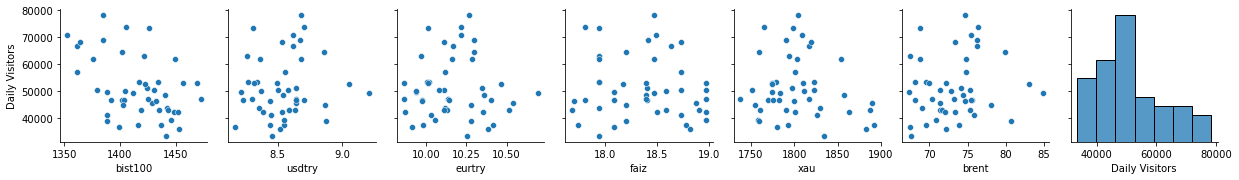

In [30]:
#Instead of adding all columns I just added numeric columns to see visual correlation
sns.pairplot(df_final,x_vars=["bist100","usdtry","eurtry","faiz","xau","brent","Daily Visitors"],y_vars=["Daily Visitors"])